# Image Processing

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Read images, set up for color and gray scale

In [3]:
img = cv.cvtColor(cv.imread("messi.jpg"), cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

## Image Smoothing

In [4]:
blur_messi = cv.blur(img, (5,5))

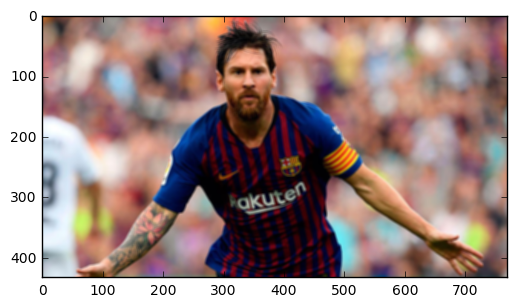

In [5]:
plt.imshow(blur_messi)
#cv.imshow(blur_messi)

## Gaussian Filtering


In [6]:
blur_messi = cv.GaussianBlur(img, (5,5), 0)
#plt.imshow(img)

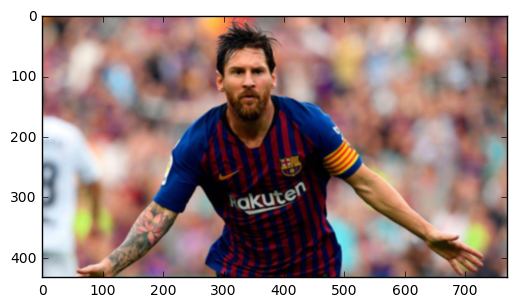

In [7]:
plt.imshow(blur_messi)

## Bilateral filtering

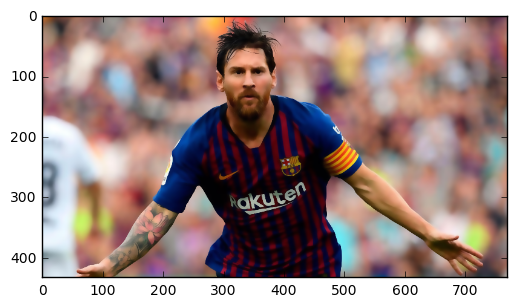

In [8]:
blur_messi = cv.bilateralFilter(img, 9, 75, 75)
plt.imshow(blur_messi)

# Geometric Transformations

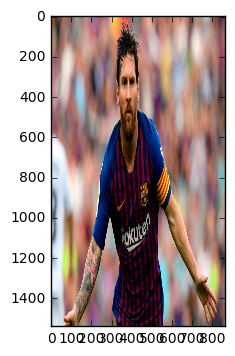

In [9]:
height, width = img.shape[:2]
res_messi = cv.resize(img, (2 * height, 2 * width), interpolation = cv.INTER_CUBIC)
plt.imshow(res_messi)

## Translation
Translation is the shifting of object's location by creating a transformation matrix M whose M[2][0] and M[0][2] as tx and ty

(433, 770, 3)


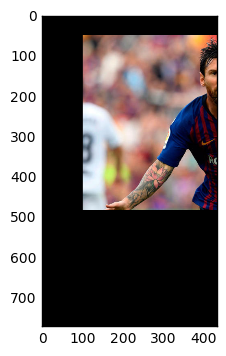

In [16]:
trans_messi = img.copy()
rows, cols, ch = trans_messi.shape
print(trans_messi.shape)
M = np.float32([[1,0,100], [0,1,50]])
dst = cv.warpAffine(trans_messi, M, (rows, cols))

plt.imshow(dst)

## Rotation

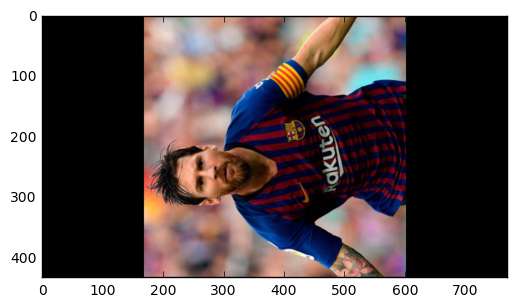

In [18]:
rot_img = img.copy()
rows, cols, ch = rot_img.shape

M = cv.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
rot_dst = cv.warpAffine(rot_img, M, (cols, rows))

plt.imshow(rot_dst)

## Affine transformation

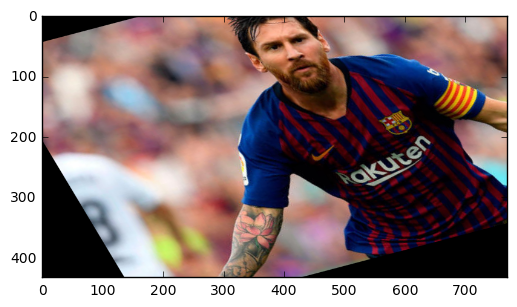

In [21]:
aff_img = img.copy()
rows, cols, ch = aff_img.shape

pts1 = np.float32([[50,50], [200,50], [50,200]])
pts2 = np.float32([[10,100], [200,50], [100,250]])

M = cv.getAffineTransform(pts1, pts2)

aff_dst = cv.warpAffine(aff_img, M, (cols, rows))

plt.imshow(aff_dst)


## Perspective transformation
3x3 matrix. Straight lines will remain straight even after the transformation. Find 4 points on the output image and corresponding points on the output image. Among these 4, 3 should not be collinear

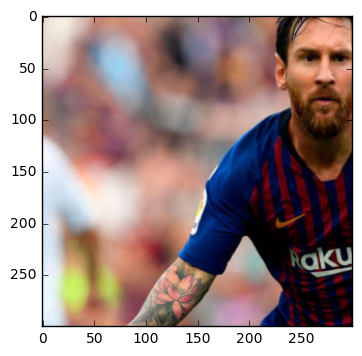

In [24]:
pers_img = img.copy()
rows, cols, ch = pers_img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv.getPerspectiveTransform(pts1,pts2)

pers_dst = cv.warpPerspective(pers_img,M,(300,300))
plt.imshow(pers_dst)

## Canny edge detection
Multistage 1. Noise reduction 2. Finding intensity gradients 3. Non-maximum supression 4. Hystersis thresholding

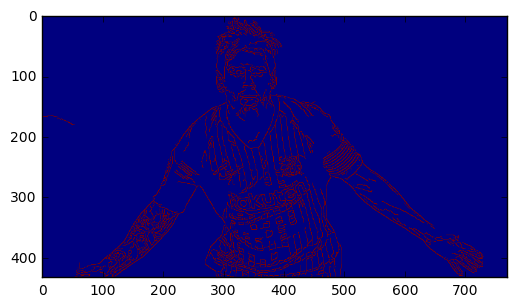

In [27]:
can_img = img.copy()
edges = cv.Canny(can_img, 100, 200)
plt.imshow(edges)